In [2]:
import pandas as pd
import os

In [3]:
weather_data = pd.read_csv('output20v2.csv')

In [4]:
weather_data = weather_data.drop(weather_data.columns[0],axis=1)

In [5]:
covid_data = pd.read_csv('covid_data/covid_19_data.csv')

In [6]:
US_covid_data = covid_data[covid_data['Country/Region']=='US']

In [7]:
US_covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,71,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
119,120,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
120,121,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
161,162,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285273,285274,05/02/2021,Virginia,US,2021-05-03 04:20:39,661314.0,10791.0,0.0
285283,285284,05/02/2021,Washington,US,2021-05-03 04:20:39,404709.0,5499.0,0.0
285286,285287,05/02/2021,West Virginia,US,2021-05-03 04:20:39,153918.0,2686.0,0.0
285288,285289,05/02/2021,Wisconsin,US,2021-05-03 04:20:39,661685.0,7567.0,0.0


In [9]:
US_weather_data = weather_data[weather_data['state'].isin(US_covid_data['Province/State'])]

In [10]:
US_weather_data[US_weather_data['state']=='Texas']

,date,datatype,station,attributes,value,locationid,state
673651,2020-01-01T00:00:00,TAVG,GHCND:USR0000TANA,",,U,",128,FIPS:48,Texas
673652,2020-01-01T00:00:00,TAVG,GHCND:USR0000TATH,",,U,",86,FIPS:48,Texas
673653,2020-01-01T00:00:00,TAVG,GHCND:USR0000TATT,",,U,",122,FIPS:48,Texas
673654,2020-01-01T00:00:00,TAVG,GHCND:USR0000TBAR,",,U,",75,FIPS:48,Texas
673655,2020-01-01T00:00:00,TAVG,GHCND:USR0000TBAS,",,U,",115,FIPS:48,Texas
...,...,...,...,...,...,...,...
700632,2020-12-31T00:00:00,TAVG,GHCND:USW00023034,"H,,S,",16,FIPS:48,Texas
700633,2020-12-31T00:00:00,TAVG,GHCND:USW00023044,"H,,S,",18,FIPS:48,Texas
700634,2020-12-31T00:00:00,TAVG,GHCND:USW00023047,"H,,S,",-19,FIPS:48,Texas
700635,2020-12-31T00:00:00,TAVG,GHCND:USW00093042,"H,,S,",-40,FIPS:48,Texas


In [37]:
type(US_weather_data.iloc[0]['date'])

str

In [38]:
type(US_covid_data.iloc[0]['ObservationDate'])

str

In [39]:
US_weather_data['date'] = pd.to_datetime(US_weather_data['date'])

C:\Users\tango\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
US_weather_data[US_weather_data['state']=='Pennsylvania'].groupby('date').mean()

,value
date,
2020-01-01,16.222222
2020-01-02,15.666667
2020-01-03,69.000000
2020-01-04,68.000000
2020-01-05,22.888889
...,...
2020-12-27,-23.000000
2020-12-28,34.285714
2020-12-29,3.000000


In [41]:
US_covid_data['ObservationDate'] = pd.to_datetime(US_covid_data['ObservationDate'])

C:\Users\tango\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
US_covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,71,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0
119,120,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0
120,121,2020-01-24,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
161,162,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285273,285274,2021-05-02,Virginia,US,2021-05-03 04:20:39,661314.0,10791.0,0.0
285283,285284,2021-05-02,Washington,US,2021-05-03 04:20:39,404709.0,5499.0,0.0
285286,285287,2021-05-02,West Virginia,US,2021-05-03 04:20:39,153918.0,2686.0,0.0
285288,285289,2021-05-02,Wisconsin,US,2021-05-03 04:20:39,661685.0,7567.0,0.0


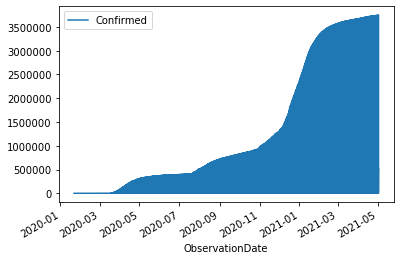

In [43]:
US_covid_data.plot(x='ObservationDate',y='Confirmed')

In [44]:
US_weather_data_avg = US_weather_data.groupby(['date','state']).mean()

In [45]:
US_weather_data_avg

value
date       state                     
2020-01-01 Alabama          70.000000
           Alaska         -158.117978
           American Samoa  284.000000
           Arizona          11.142857
           Arkansas         46.857143
...                               ...
2020-12-31 Virginia         93.384615
           Washington        7.720930
           West Virginia    64.200000
           Wisconsin       -70.888889
           Wyoming         -65.311321

[18971 rows x 1 columns]